In [1]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt
import sympy

import geometrik.threed as g3d

from goto.globe.plot import GlobePlotMpl

In [2]:
u = sympy.symbols('u')

L'idée est de prendre le plan equatorial et de l'incliner d'un angle $\theta$ autour de l'axe $Ox$

In [3]:
Ex = g3d.Vector(1, 0, 0)
Ey = g3d.Vector(0, 1, 0)
Ez = g3d.Vector(0, 0, 1)

In [4]:
theta, psi = sympy.symbols('theta psi')

Nz = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta))
Ny = g3d.Vector(0, sympy.cos(theta), sympy.sin(theta))
Nx = g3d.Vector(1, 0, 0)

Pz = g3d.Plane(Nz)

m_val = {'theta': math.pi / 4, 'psi': 0.3}

In [5]:
Ux = g3d.Vector(sympy.cos(psi), sympy.sin(psi), 0)
Ux

Vector(\cos{\left(\psi \right)}, \sin{\left(\psi \right)}, 0)

In [6]:
Mx = Pz.project(Ux)
Mx.x

cos(psi)

In [7]:
Mx.y.simplify()

sin(psi)*cos(theta)**2

In [8]:
Mx.z.simplify()

cos(psi - 2*theta)/4 - cos(psi + 2*theta)/4

In [9]:
Mz = (Ux * Nz) * Nz
Mz

Vector(0, \sin{\left(\psi \right)} \sin^{2}{\left(\theta \right)}, - \sin{\left(\psi \right)} \sin{\left(\theta \right)} \cos{\left(\theta \right)})

<IPython.core.display.Javascript object>


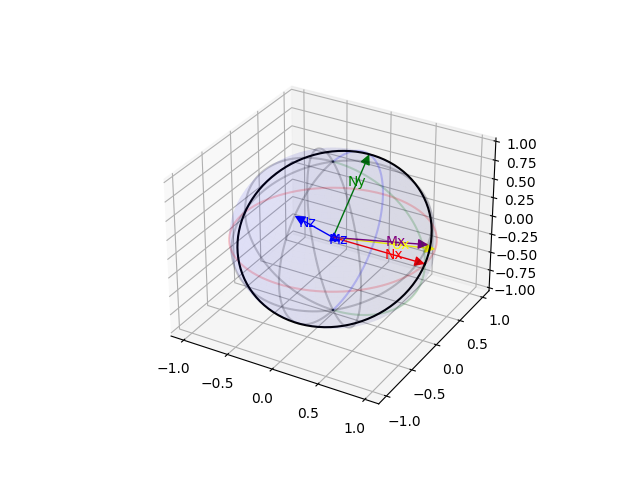

[1.0, 0.0, -0.0] [0.0, 0.7071067811865476, 0.7071067811865475]


In [10]:
with GlobePlotMpl() as gpl :
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_point(Mz.subs(m_val), 'Mz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'k')
    gpl.add_point(Ux.subs(m_val), 'Ux', 'yellow')
    gpl.add_point(Mx.subs(m_val), 'Mx', 'purple')

In [11]:
Nx.subs({'theta': 0.3})
R = sympy.symbols('R')

In [12]:
r = Ux.angle_to(Mx).simplify()
r

acos(sqrt(-sin(psi)**2*sin(theta)**2 + 1))

In [13]:
r_sol = sympy.solve(r - R, theta)

In [14]:
r_sol[0]

pi - asin(sqrt(sin(R)**2)/sin(psi))

In [15]:
r_sol[1]

asin(sqrt(sin(R)**2)/sin(psi)) + pi

In [16]:
r_sol[2]

-asin(sqrt(sin(R)**2)/sin(psi))

In [65]:
r_sol[3].simplify()

asin(sqrt(sin(R)**2)/sin(psi))

In [26]:
theta_lst = [float(r_sol[i].subs({'psi': 0.3, 'R': 0.1})) for i in range(4)]
theta_lst

[2.796990081522665, 3.486195225656921, -0.3446025720671279, 0.3446025720671279]

<IPython.core.display.Javascript object>


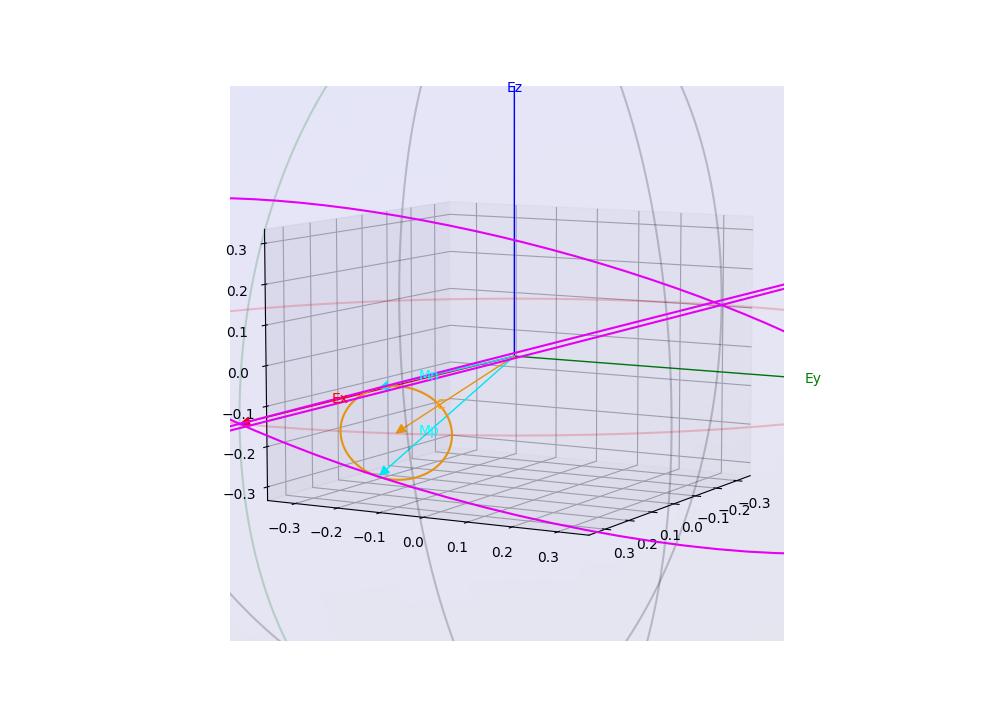

[-1.0, 0.0, 0.0] [0.0, -0.9412097870883732, 0.3378226408769243]
[1.0, 0.0, -0.0] [0.0, 0.9412097870883732, 0.3378226408769243]


In [45]:
C = g3d.Vector.compose(Ex, Ey, 0.3)

Pp = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta)).subs({'theta': theta_lst[2]})
Pn = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta)).subs({'theta': theta_lst[3]})
Mp = g3d.Plane(Pp).project(C)
Mn = g3d.Plane(Pn).project(C)

with GlobePlotMpl() as gpl :
    gpl.add_point(Ex, 'Ex', 'r')
    gpl.add_point(Ey, 'Ey', 'g')
    gpl.add_point(Ez, 'Ez', 'b')
    gpl.add_point(Mp, 'Mp', 'cyan')
    gpl.add_point(Mn, 'Mn', 'cyan')

    gpl.add_point(g3d.Vector(sympy.cos(psi), sympy.sin(psi), 0).subs({'psi': 0.3}), 'C', 'orange')
    gpl.add_circle(C, 0.1, 'orange')    
    gpl.add_great_circle(Pp, 'magenta')
    gpl.add_great_circle(Pn, 'magenta')


<IPython.core.display.Javascript object>


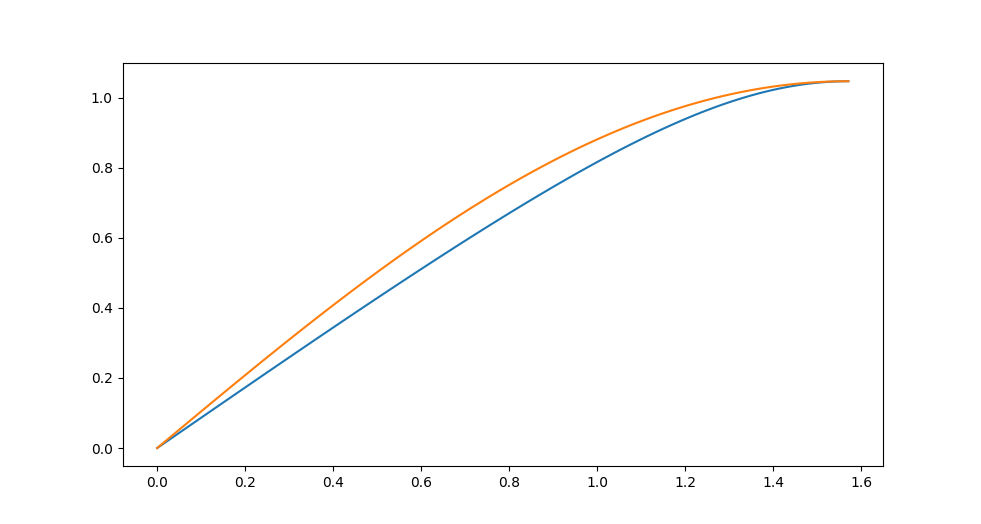

In [41]:
r_lst = list()
t_lst = np.linspace(0.0, math.pi/2, 100)
u_lst = list()
k = math.pi / 3
for t in t_lst :
    r_lst.append(math.acos(math.sqrt(1 - (math.sin(k)**2 * math.sin(t)**2))))
    u_lst.append(math.sin(t)* k)

plt.figure()
plt.plot(t_lst, r_lst)
plt.plot(t_lst, u_lst)
plt.show()

La question se pose maintenant de manière plus générale : étant donné deux points A et B, et un rayon de virage donné, trouver les 4 segments qui forment les tangentes à ces cercles.

In [59]:
Ax, Ay, Az = sympy.symbols('Ax Ay Az')
A = g3d.Vector(Ax, Ay, Az)

In [60]:
Bx, By, Bz = sympy.symbols('Bx By Bz')
B = g3d.Vector(Bx, By, Bz)

Cx est le point exactement au milieu des deux cercles, comme ils sont de taille égales, c'est également le point de croisement des tangentes. 

In [61]:
Cx = (A + B).normalized()
Cx.x

(Ax + Bx)/sqrt((Ax + Bx)**2 + (Ay + By)**2 + (Az + Bz)**2)

Cz est le vecteur perpendiculaire au plan equatorial contenant A et B, et Cy construit la base Cx, Cy, Cz, directe

In [62]:
Cz = (A @ B).normalized()
Cz.x

(Ay*Bz - Az*By)/sqrt((Ax*By - Ay*Bx)**2 + (-Ax*Bz + Az*Bx)**2 + (Ay*Bz - Az*By)**2)

In [63]:
Cy = (Cz @ Cx)

In [64]:
Psi_intern = Cx.angle_to(B)